In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
nb_classes = 10

In [4]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [5]:
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [6]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [7]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [8]:
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.arg_max(Y, 1))

Instructions for updating:
Use `argmax` instead


In [9]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [10]:
training_epoch = 1
batch_size = 100

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [12]:
for epoch in range(training_epoch):
    avg_cost = 0
    total_batch = int (mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict = {X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
        
    print('Epoch: ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))

Epoch:  0001 cost =  3.032014664
Epoch:  0002 cost =  1.120573661
Epoch:  0003 cost =  0.880680097
Epoch:  0004 cost =  0.767161769
Epoch:  0005 cost =  0.696353773
Epoch:  0006 cost =  0.645650404
Epoch:  0007 cost =  0.608591598
Epoch:  0008 cost =  0.578575697
Epoch:  0009 cost =  0.553591657
Epoch:  0010 cost =  0.533351025
Epoch:  0011 cost =  0.515999318
Epoch:  0012 cost =  0.500822169
Epoch:  0013 cost =  0.487387588
Epoch:  0014 cost =  0.475489082
Epoch:  0015 cost =  0.464621703


In [13]:
# sess.run()할 수도, accuracy.eval(session = sess, ) 로도 할 수 있다.
print("Accuracy: ", accuracy.eval(session = sess, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}))

Accuracy:  0.8918


In [14]:
import matplotlib.pyplot as plt
import random

Label:  [5]
Prediction:  [5]


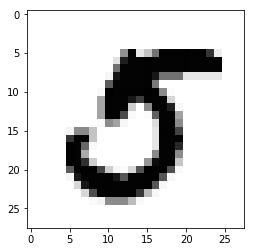

In [46]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict = {X: mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()